# Compréhensions de listes et récursion

Les listes de Python sont très versatiles ; elles sont beaucoup utilisées dans des situations dont le point commun est de nécessiter le stockage d'élements en séquence, c'est-à-dire avec un ordre donné.

On rappelle que les listes de Python sont des objets mutable (à l'opposé des tuples que l'on note avec une parenthèse) qui possèdent un grand nombre de [méthodes de classe](../01-python-base/fonctions-modules.ipynb#Méthodes-de-liste). Il existe de plus une manière très expressive de manipuler les listes : les **compréhensions de listes** (« list comprehension » en anglais).

Les schémas de manipulations les plus fréquents pour les listes sont:

* **schémas de construction** de liste de manière algorithmique, c'est-à-dire pas à partir d'une autre liste

* **schémas de transformation** en appliquant à chaque élement de la liste une fonction à un argument

* **schémas de filtrage** en sélectionnant les élements d'une liste avec une condition donnée agissant sur chaque élement de la liste (voir [Logique, structures de contrôle et filtrage](../02-python-intermediaire/logique-filtrage.ipynb))

* **schémas de réduction** en réduisant l'information disponible dans la liste par une procédure algorithmique

Les compréhensions de liste permettent d'appliquer les trois premiers schémas de manière élégante, et surtout très intuitive à la lecture. Les schémas de réductions peuvent eux être généralisés à l'aide des fonctionnelles.

## Schéma de construction

On peut créer une liste à partir d'un intervalle d'entiers en définissant la fonction suivante:

In [ ]:
# definition de la fonction naturelsFor
def naturelsFor(a, b):
    ''' retourne une liste d'entiers [a,b[ '''
    listRes = []
    for k in range(a, b):
        listRes.append(k)
    return listRes

Pour vérifier le fonctionnement de la fonction, on peut utiliser l'instruction `assert`. Cette instruction vérifie que la fonction produit bien le résultat attendu. Si ce n'est pas le cas elle renvoie un message d'erreur, sinon elle ne renvoie rien:

In [ ]:
assert naturelsFor(2,8) == [2, 3, 4, 5, 6, 7]
assert naturelsFor(-3,1) == [-3, -2, -1, 0]

### Exercice
On rappelle que l'objet de type `range` est différent d'une liste (vu [par ici](../02-python-intermediaire/iteration.ipynb#L'instruction-for)). Pour le convertir en liste, on peut utiliser la fonction `list()`. Proposez un test de la fonction `naturelsFor()` avec `assert`, en comparant son résultat au résultat d'une liste construite avec `range()`.

In [ ]:
assert naturelsFor(-3,1) == list(range(-3,1))

## Compréhension de liste

La fonction `naturelsFor` n'est pas optimisée du tout, et sa lecture est plutôt lourde. Elle peut se réduire à la simple ligne:

In [ ]:
# definition de la fonction naturelsFor2
def naturelsFor2(a, b):
    ''' retourne une liste d'entiers [a,b[ '''
    return [k for k in range(a, b)]

# appel de la fonction
print(naturelsFor2(-3,1))

Ce qui est entre crochet `[...]` est une compréhension de liste. Elle peut se lire:

> « Construit la liste des $k$ pour $k$ dans l'intervalle $[a, b[$ »

On dit que les compréhensions de liste ont un *caractère déclaratif*.

La syntaxe générale d'une compréhension de liste est la suivante:

> `[ <elem> for <var> in <seq> ]`

où `<var>` est la variable de compréhension, `<elem>` est une expression appliquée aux valeurs successives de la variable `<var>` et `<seq>` est une expression qui retourne une séquence.

### Exercice
Notez que `<seq>` peut être n'importe quelle séquence, ce qui inclue donc les chaînes de caractères `str`. A vous de faire des essais.


In [ ]:
mot = "ABCDEFG"

Grâce à une compréhension de liste, créer une liste de chaîne de caractères à partir de la variable `mot` de la forme `['A0', 'B0', 'C0', ...]`

In [ ]:
[s+'0' for s in mot]

## Schéma de transformation

On a plusieurs choix pour utiliser un schéma de transformation. Ainsi, si l'on a défini la fonction

In [ ]:
# definition de la fonction carre
def carre(x):
    ''' retourne le carre de x '''
    return x*x

alors, on peut écrire

In [ ]:
[carre(k) for k in range(1, 7)]

afin d'appliquer la fonction `carre()` à chaque entier compris dans $[1,7[$.

### Exercice
Il est possible d'avoir une écriture encore plus compacte en utilisant les [formes lambda](../02-python-intermediaire/fonctions.ipynb#Forme-lambda). Proposez une alternative à la question précédente avec une forme lambda.

In [ ]:
[(lambda x: x*x)(x) for x in range(1, 7)]

Cependant, ce n'est pas optimal car dans ce cas, vous aller créer à la volée 6 formes lambda qui sont en fait les mêmes. Mais vous faites l'économie de nommer la fonction, ce qui peut-être le but.

## La fonction `map()`
La fonction générique `map()` offre une alternative aux compréhensions de liste pour exprimer de façon concise des transformations de listes. 

La fonction `map()` applique une fonction sur un objet, par exemple sur une liste:

In [ ]:
map(lambda x : x*x, [1, 2, 3, 4, 5])

`map()` renvoie un **itérateur** et non pas une liste. Un itérateur est une notion avancée de python que nous ne traiterons pas en détail ici. Afin de le transformer en liste, on peut utiliser la fonction `list()`:

In [ ]:
list(map(lambda x : x*x, [1, 2, 3, 4, 5]))

La forme lambda est bien adaptée dans ce cas.

## Schéma de filtrage
On peut ajouter la possibilité de faire du filtrage sur les élements sur lesquels on itère dans `<seq>`. La syntaxe est la suivante:

> `[ <elem> for <var> in <seq> if <condition> ]`

où `<condition>` est une expression booléenne portant sur la variable de compréhension, ici `<var>`. Dans cet exemple, on prend le carré de chaque élément de la liste, à condition que l'élément de la liste soit pair:

In [4]:
[k*k for k in range(1, 7) if k%2 == 0]

[4, 16, 36]

On peut donner une instruction alternative si la condition n'est pas remplie avec `else`. Par exemple, on applique la fonction carre pour les éléments pairs, et la fonction cube pour les éléments impairs:

In [7]:
[k*k if k%2 == 0 else k*k*k for k in range(1, 7)]

[1, 4, 27, 16, 125, 36]

Attention: dans ce cas les instruction `if ... else` sont placées *avant* l'instruction `for`.

### Exercice

In [ ]:
mot = "vwsxyazvxlwyzuvwxtxv wxycv'wxezyvxyszwtxyz zywvcvwzoywzovxlwzy"

A l'aide d'une compréhension de liste conditionnelle, créer une liste de toutes les lettres strictement inférieures à `'v'` de la variable `mot`.

In [ ]:
print([s for s in mot if s < 'v'])

## Compréhension multiple
Pour achever cette présentation, on peut utiliser des compréhensions multiples. Par exemple:

In [ ]:
[(i, j) for i in range(1, 4) for j in range(i, 4)]

## Récursion
Une fonction peut en appeler une autre, et peut donc s'appeler elle-même! C'est ce que l'on appelle une **fonction récursive**, et cela permet de créer des fonctions très ingénieuse.

Regardez par exemple cette fonction de signature `compte-à-rebours(n)`:

In [10]:
# definition de la fonction de compte-a-rebours
def compte_a_rebours(n):
    ''' affiche un compte-a-rebours a partir de n '''
    if n <= 0:
        print('Partez !')
    else:
        print(n)
        compte_a_rebours(n-1)

Si la variable `n` est inférieur ou égale à 0, la fonction affiche `Partez !`, sinon elle affiche la valeur de `n` et elle appelle la fonction `compte_a_rebours`, c'est-à-dire elle-même, avec l'argument `n-1`.

Par exemple:

In [12]:
compte_a_rebours(3)

3
2
1
Partez !


## Représentation graphique d'une série mathématique
Nous introduisons la série $S_n$ définie par:

$$
S_n = \frac{3n-5}{2n+2}
$$

où $S_n$ est un nombre réel et $n$ un entier positif.

Nous pouvons calculer la liste des $N$ premiers éléments de cette suite avec une fonction une compréhension de liste:

In [58]:
# nombre de termes
N = 25

# definition de la fonction suite
def F(n):
    ''' retourne l'element Sn de la suite '''
    return (3*n - 5) / (2*n + 2)

# liste des elements
liste_elements = [F(k) for k in range(N)]

Dans ce cas, la suite n'est qu'une version discrete de la fonction `F`. Nous pouvons représenter sur un même graphique les éléments de la suite et la fonction:

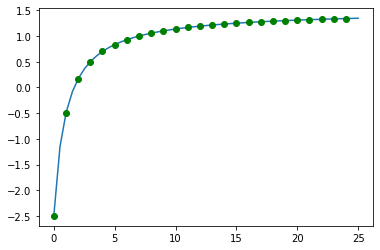

In [59]:
# import des modules
import numpy as np
import matplotlib.pyplot as plt

# trace de la fonction
x = np.linspace(0,N)
plt.plot(x, F(x))

# trace des elements de la suite
plt.plot(range(N), liste_elements, 'og')

Pour illustrer la façon donc chaque élément est calculé, on peut relier l'argument de la fonction et son image par un segment:

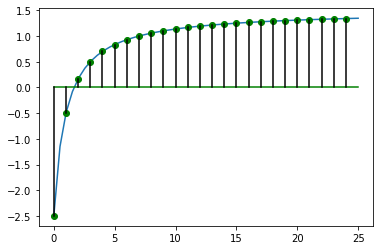

In [60]:
# trace de la fonction
x = np.linspace(0,N)
plt.plot(x, F(x))

# trace des elements de la suite
plt.plot(range(N), liste_elements, 'og')

# trace de la ligne y = 0
plt.plot([0, N], [0, 0], 'g')

# trace des segments
for k in range(N):
    plt.plot([k, k], [0, F(k)], 'k')

Un peu plus intéressant, introduisons maintenant la suite $u_n$ définie par récurrence:

$$
u_{n+1} = u_n - \ln{u_n}
$$

Une écriture équivalente est:

$$
u_{n+1} = G(u_n), \ \text{avec} \ G(x) = x - \ln{x}
$$

Ainsi, le terme $n+1$ est trouvé en prenant l'image par la fonction $G$ du terme $n$. Supposons que $u_0=10$, on peut alors calculer $u_1$:

In [65]:
# initialisation de la suite
u0 = 10

# definition de la fonction G
def G(x):
    return x - np.log(x)

# calcul des termes suivants
u1 = G(u0)
u2 = G(u1)

# affichage
print(u1)
print(u2)

7.697414907005954
5.656530360877891


On peut illustrer cela sur le graphique suivant. D'abord, on trace la bissectrice $y=x$ et la fonction $G$. Ensuite, pour trouver $u_1$:

1. on place le point $U_0 \ (x=u_0, y=u_0)$ sur la bissectrice
2. on place le point $U_{01} \ (x=u_0, y=G(u_0)=u_1)$ sur la fonction $G$ en traçant une ligne verticale depuis le point $U_0$

Pour trouver le point suivant:

3. on place le point $U_1 \ (x=u_1, y=u_1)$ sur la bissectrice en traçant une ligne horizontale depuis le point $U_{01}$
4. on place le point $U_{12} \ (x=u_1, y=G(u_1)=u_2)$ sur la fonction $G$ en traçant une ligne verticale depuis le point $U_1$

et ainsi de suite ...

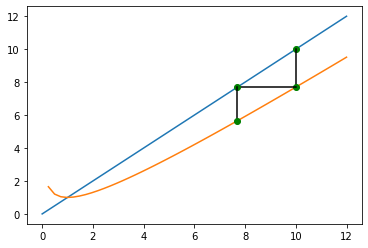

In [76]:
# limites des abscisses
xb = 0
xe = 12

# trace de la bissectrice et de la fonction G
x = np.linspace(xb,xe)
plt.plot(x, x)
plt.plot(x, G(x))

# etape 1: point U0
plt.plot([u0], [u0], 'og')

# etape 2: image du point U0 avec une ligne 
#   verticale -> U_01
u1 = G(u0)
plt.plot([u0, u0], [u0, u1], 'k')
plt.plot([u0], [u1], 'og')

# etape 3: placer le point U1 sur la bissectrice 
#   avec une ligne horizontale depuis U_01
plt.plot([u0, u1], [u1, u1], 'k')
plt.plot([u1], [u1], 'og')

# etape 4: image du point U1 avec une ligne 
#   verticale -> U_12
u2 = G(u1)
plt.plot([u1, u1], [u1, u2], 'k')
plt.plot([u1], [u2], 'og')

On voit que cette visualisation peut se généraliser à N points avec une boucle `for`:

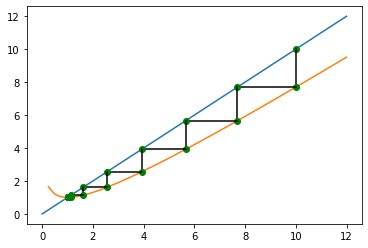

In [77]:
# limites des abscisses et nommbre de recurrence
xb = 0
xe = 12
N = 10

# trace de la bissectrice et de la fonction G
x = np.linspace(xb,xe)
plt.plot(x, x)
plt.plot(x, G(x))

# Initialisation
plt.plot([u0], [u0], 'og')

# recurrence
for k in range(N):
    # etape 2: image du point U0 avec une ligne 
    #   verticale -> U_01
    u1 = G(u0)
    plt.plot([u0, u0], [u0, u1], 'k')
    plt.plot([u0], [u1], 'og')
    # etape 3: placer le point U1 sur la bissectrice 
    #   avec une ligne horizontale depuis U_01
    plt.plot([u0, u1], [u1, u1], 'k')
    plt.plot([u1], [u1], 'og')
    # recurrence:
    u0 = u1

On voit que la suite tend vers une limite finie.